In [5]:
from xgboost import XGBClassifier
import pandas as  pd 
import data_utils as d_utils
import general_utils as g_utils
import model_utils as m_utils
from tqdm import tqdm

In [6]:
col_names = ['syll1_s_freq','syll2_s_freq','syll3_s_freq','syll4_s_freq','syll5_s_freq','syll6_s_freq','syll7_s_freq','syll8_s_freq','syll9_s_freq','syll10_s_freq',
            'syll1_e_freq','syll2_e_freq','syll3_e_freq','syll4_e_freq','syll5_e_freq','syll6_e_freq','syll7_e_freq','syll8_e_freq','syll9_e_freq','syll10_e_freq',
            'syll1_dist','syll2_dist','syll3_dist','syll4_dist','syll5_dist','syll6_dist','syll7_dist','syll8_dist','syll9_dist','syll10_dist',
            'syll1_dur','syll2_dur','syll3_dur','syll4_dur','syll5_dur','syll6_dur','syll7_dur','syll8_dur','syll9_dur','syll10_dur',
             'mother_gen',
             'pup_sex',
             'avg_ISI_time','pup_age','session','pup_strain',
             'pup_gen',
             'mouse_idx'
]
seed=25
propotion=0.7
k_fold=5
dataset = pd.read_csv(r"..\data\processed_data_for_final_classification_REDUCTION_BY_RECORDING_ALLDATA.csv", header=None, names=col_names)
train_validation_dataset,test_dataset,train_validation_ids,test_ids = d_utils.get_train_val_test_dataset(dataset,propotion)


In [7]:
k_fold_results_per_estimators = []
for n_estimators in tqdm(range(5,200,25)):
    model = XGBClassifier(n_estimators=n_estimators, random_state=seed, learning_rate=0.01, max_depth=7, objective='binary:logistic', booster='gbtree',
reg_lambda = 1.5, reg_alpha = 0.05, min_child_weight = 0.1, scale_pos_weight = 0.8, colsample_bytree = 0.6)
    k_fold_results = m_utils.k_fold_cross_validation(train_validation_dataset,k_fold,model, target_column='pup_gen', id_column='mouse_idx', split_function=d_utils.split_dataset, evaluation_function=m_utils.majority_voting_evaluation,num_estimators=n_estimators)
    k_fold_results_per_estimators.append(k_fold_results)

 12%|█▎        | 1/8 [00:01<00:09,  1.36s/it]

Est 5:  Training Accuraccy = 0.3333333333333333
Est 5:  Validation Accuraccy = 0.3333333333333333
*******************


 25%|██▌       | 2/8 [00:03<00:09,  1.59s/it]

Est 30:  Training Accuraccy = 0.7864583333333334
Est 30:  Validation Accuraccy = 0.7708333333333334
*******************


 38%|███▊      | 3/8 [00:05<00:09,  1.84s/it]

Est 55:  Training Accuraccy = 0.8489583333333334
Est 55:  Validation Accuraccy = 0.75
*******************


 50%|█████     | 4/8 [00:08<00:08,  2.21s/it]

Est 80:  Training Accuraccy = 0.8854166666666666
Est 80:  Validation Accuraccy = 0.7916666666666666
*******************


 62%|██████▎   | 5/8 [00:11<00:08,  2.71s/it]

Est 105:  Training Accuraccy = 0.8697916666666666
Est 105:  Validation Accuraccy = 0.7291666666666666
*******************


 75%|███████▌  | 6/8 [00:15<00:06,  3.17s/it]

Est 130:  Training Accuraccy = 0.890625
Est 130:  Validation Accuraccy = 0.6875
*******************


 88%|████████▊ | 7/8 [00:20<00:03,  3.57s/it]

Est 155:  Training Accuraccy = 0.9114583333333334
Est 155:  Validation Accuraccy = 0.75
*******************


100%|██████████| 8/8 [00:25<00:00,  3.15s/it]

Est 180:  Training Accuraccy = 0.9114583333333334
Est 180:  Validation Accuraccy = 0.6041666666666666
*******************


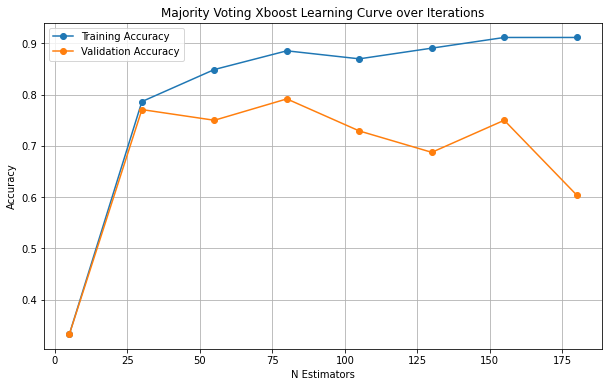

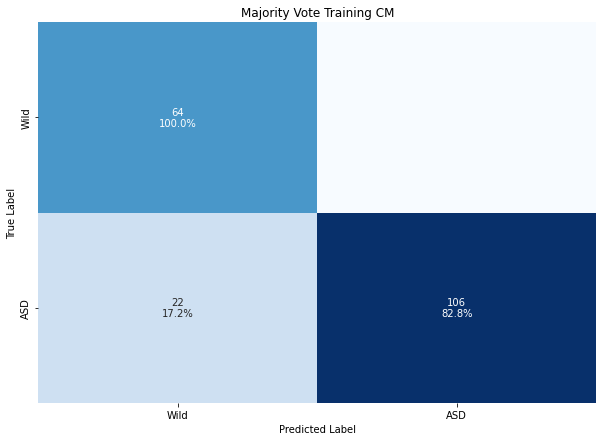

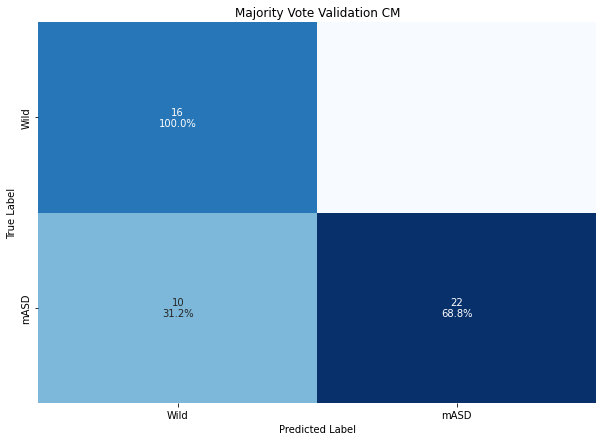

In [8]:
fig_curve = g_utils.plot_train_val_acc_curve(k_fold_results_per_estimators)
fig_curve.savefig(r'..\Majority Voting Outputs\training_curve.png')
index = 3
fig_cm_train = g_utils.plot_confusion_matrix(k_fold_results_per_estimators[index].training.y_trues,k_fold_results_per_estimators[index].training.y_preds,['Wild','ASD'],title='Majority Vote Training CM')
fig_cm_eval =  g_utils.plot_confusion_matrix(k_fold_results_per_estimators[index].validation.y_trues,k_fold_results_per_estimators[index].validation.y_preds,['Wild','mASD'],title='Majority Vote Validation CM')
fig_cm_train.savefig(r'..\Majority Voting Outputs\cm_train.png')
fig_cm_eval.savefig(r'..\Majority Voting Outputs\cm_eval.png')

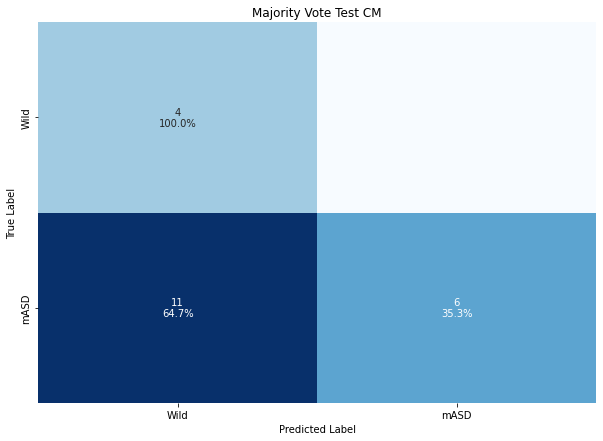

In [9]:
n_estimators = k_fold_results_per_estimators[index].validation.n_estimators
model = XGBClassifier(n_estimators=n_estimators, random_state=seed, learning_rate=0.01, max_depth=7, objective='binary:logistic', booster='gbtree',
reg_lambda = 1.5, reg_alpha = 0.05, min_child_weight = 0.1, scale_pos_weight = 0.8, colsample_bytree = 0.6)

y_true,y_pred,stat_df = m_utils.run_train_and_test(model,dataset,train_validation_ids,test_ids)
acc_test = m_utils.accuracy_score(y_true, y_pred)
fig_cm_test = g_utils.plot_confusion_matrix(y_true,y_pred,['Wild','mASD'],title='Majority Vote Test CM')
fig_cm_test.savefig(r'..\Majority Voting Outputs\cm_test.png')
